<a href="https://colab.research.google.com/github/Vanagand/DS-Unit-1-Build/blob/master/DS_Unit_1_Build.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Import

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.font_manager import FontProperties

In [3]:
cdn_agro_land_df = pd.read_csv('https://github.com/Vanagand/DS-Unit-1-Build/raw/master/cnd_agro_land_area.csv')

# .drop(['input'], axis=int, inplace=bool)
# .reset_index()
# .rename({'input':'output', 'input': 'output'}, axis=int)

cdn_agro_land_df.head()

,year,area
0,1961,698250.0
1,1962,699530.0
2,1963,700810.0
3,1964,702080.0
4,1965,703370.0


In [4]:
def val_to_int(val_content): # Feature to_int
  return int(val_content)

cdn_agro_land_df['area'] = cdn_agro_land_df['area'].apply(val_to_int)

cdn_agro_land_df.head()

,year,area
0,1961,698250
1,1962,699530
2,1963,700810
3,1964,702080
4,1965,703370


In [5]:
round(cdn_agro_land_df.describe(), 1)

,year,area
count,56.0,56.0
mean,1988.5,672567.4
std,16.3,21746.3
min,1961.0,625970.0
25%,1974.8,665970.0
50%,1988.5,677750.0
75%,2002.2,684837.5
max,2016.0,704640.0


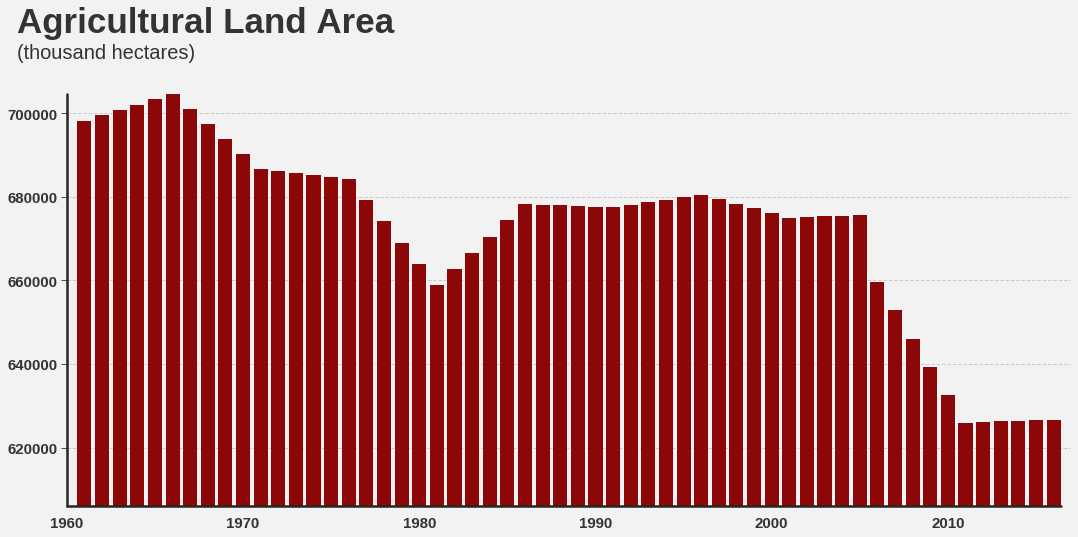

In [290]:
fig, ax = plt.subplots(figsize=(18, 8))

font = FontProperties()
font.set_style('normal')

fig.patch.set(facecolor='#F2F2F2') # Background (exterior)
ax.set(facecolor='#F2F2F2') # Axes background (interior)

plt.style.use('seaborn-ticks')

plt.title(x=-0.05, y=1.09, label="Agricultural Land Area", 
          ha='left', fontproperties=font, weight='bold', fontsize=35, 
          color='#333333', transform=ax.transAxes)
ax.text(x=-0.05, y=1.0315, s='(thousand hectares)', 
        ha='left', weight='normal', fontsize=20, color='#333333', 
        transform=ax.transAxes)

plt.bar(cdn_agro_land_df['year'], cdn_agro_land_df['area'], 
        width=0.8, align='center', color='#8C0808')
# plt.axvline(x=0, linestyle='--', color='black', linewidth=1, alpha=0.2)
# plt.axhline(y=0, linestyle='--', color='black', linewidth=1, alpha=0.2)
ax.tick_params(axis='both', which='both', labelsize=12, 
               bottom=False, top=False, labelbottom=True,
               left=True, right=False, labelleft=True)

ax.set_xticklabels(['1960', '1970', '1980', '1990', '2000', '2010'], 
                   size=15, weight='bold', color='#333333')
ax.set_yticklabels(range(600000, 710000, 20000), 
                   size=15, weight='bold', color='#333333')

ax.grid(True, 'major', 'y', ls='--', lw=1, c='#333333', alpha=.2)

plt.xlim(1960, 2017)
plt.ylim(605970, 710000)

ax.spines['left'].set_visible(True)
ax.spines['left'].set_smart_bounds(True)
ax.spines['left'].set_linewidth(2.5)
ax.spines['left'].set_capstyle("round")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['bottom'].set_smart_bounds(True)
ax.spines['bottom'].set_linewidth(2.5)
ax.spines['bottom'].set_capstyle("round")

plt.show()

In [7]:
cdn_incidence_df = pd.read_csv('https://github.com/Vanagand/DS-Unit-1-Build/raw/master/cdn_cancer_1990_2016_incidence.csv?raw=true')

cdn_incidence_df.head()

,location,sex,age,cancer,metric,year,value
0,Canada,Male,All Ages,Neoplasms,Number,2006,82699.527550
1,Canada,Female,All Ages,Neoplasms,Number,2006,75184.594900
2,Canada,Both,All Ages,Neoplasms,Number,2006,157884.122400
3,Canada,Male,All Ages,Neoplasms,Rate,2006,513.241567
4,Canada,Female,All Ages,Neoplasms,Rate,2006,458.344266


In [8]:
cdn_incidence_df['cancer'].value_counts().head(6)

Gallbladder and biliary tract cancer    18
Neoplasms                               18
Malignant skin melanoma                 18
Liver cancer due to alcohol use         18
Nasopharynx cancer                      18
Hodgkin lymphoma                        18
Name: cancer, dtype: int64

In [9]:
cancer_condition = (cdn_incidence_df['cancer'] == 'All causes') & (cdn_incidence_df['metric'] == 'Number')
cdn_incidence_all_df = cdn_incidence_df[cancer_condition]

cdn_incidence_all_df

,location,sex,age,cancer,metric,year,value
108,Canada,Male,All Ages,All causes,Number,2006,8.349612e+07
109,Canada,Female,All Ages,All causes,Number,2006,9.726829e+07
110,Canada,Both,All Ages,All causes,Number,2006,1.807644e+08
366,Canada,Male,All Ages,All causes,Number,2016,9.387475e+07
367,Canada,Female,All Ages,All causes,Number,2016,1.087100e+08
368,Canada,Both,All Ages,All causes,Number,2016,2.025848e+08


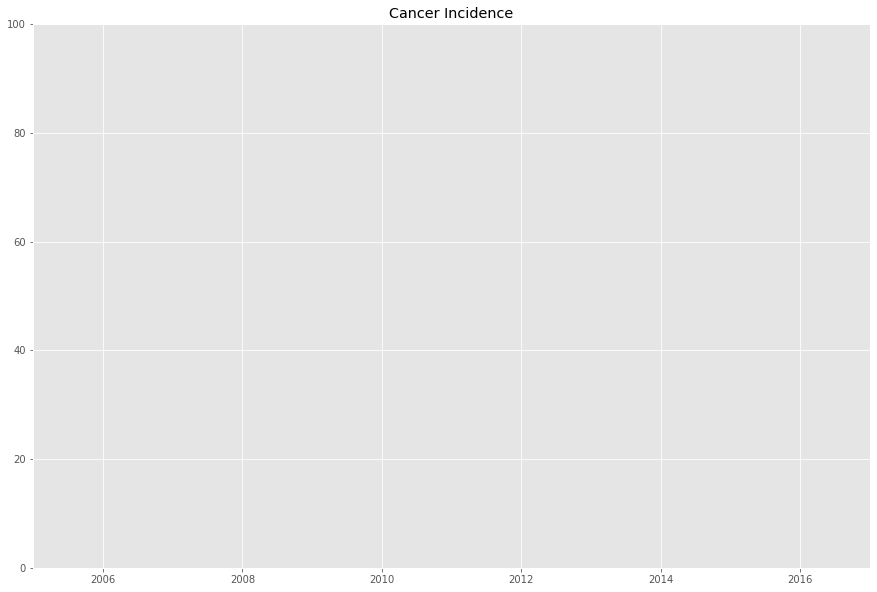

In [10]:
plt.style.use('ggplot')
plt.figure(figsize=(15, 10)) # Cluster graph 
plt.title("Cancer Incidence")
plt.scatter(cdn_incidence_all_df['value'], cdn_incidence_all_df['year'])

plt.xlim(2005, 2017)
plt.ylim(0, 100)
plt.show()

In [11]:
cdn_cancer_2013_2017_df = pd.read_csv('https://github.com/Vanagand/DS-Unit-1-Build/raw/master/cdn_cancer_2013_2017.csv')

# Isolating cancer incidents by province
geo_pe = (cdn_cancer_2013_2017_df['geo'] == 'Prince Edward Island') &\
(cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_cdn = (cdn_cancer_2013_2017_df['geo'] == 'Canada (excluding Quebec)') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_sk = (cdn_cancer_2013_2017_df['geo'] == 'Saskatchewan') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_nb = (cdn_cancer_2013_2017_df['geo'] == 'New Brunswick') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_nt = (cdn_cancer_2013_2017_df['geo'] == 'Northwest Territories') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_nu = (cdn_cancer_2013_2017_df['geo'] == 'Nunavut') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_mb = (cdn_cancer_2013_2017_df['geo'] == 'Manitoba') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_ns = (cdn_cancer_2013_2017_df['geo'] == 'Nova Scotia') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_on = (cdn_cancer_2013_2017_df['geo'] == 'Ontario') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_nl = (cdn_cancer_2013_2017_df['geo'] == 'Newfoundland and Labrador') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_bc = (cdn_cancer_2013_2017_df['geo'] == 'British Columbia') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_ab = (cdn_cancer_2013_2017_df['geo'] == 'Alberta') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_yt = (cdn_cancer_2013_2017_df['geo'] == 'Yukon') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')
geo_all = (cdn_cancer_2013_2017_df['geo'] != 'Canada (excluding Quebec)') &\
 (cdn_cancer_2013_2017_df['uom'] == 'Number')

all_cdn = cdn_cancer_2013_2017_df[geo_all]

cdn_cancer_2013_2017_df[geo_yt]


,year,geo,age,sex,(ICD-O-3),characteristics,uom,value
100,2013,Yukon,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,Number,140.0
101,2014,Yukon,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,Number,130.0
102,2015,Yukon,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,Number,170.0
103,2016,Yukon,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,Number,165.0
104,2017,Yukon,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,Number,155.0


In [12]:
geo_province = (cdn_cancer_2013_2017_df['geo'] != 'Canada (excluding Quebec)') &\
(cdn_cancer_2013_2017_df['uom'] == 'Number')

print(cdn_cancer_2013_2017_df[geo_province]['value'].describe())

cdn_cancer_2013_2017_df[geo_pe]

count       60.000000
mean     12285.250000
std      21089.443689
min         65.000000
25%        698.750000
50%       5137.500000
75%       8971.250000
max      79670.000000
Name: value, dtype: float64


,year,geo,age,sex,(ICD-O-3),characteristics,uom,value
20,2013,Prince Edward Island,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,Number,875.0
21,2014,Prince Edward Island,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,Number,890.0
22,2015,Prince Edward Island,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,Number,910.0
23,2016,Prince Edward Island,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,Number,890.0
24,2017,Prince Edward Island,"Total, all ages",Both sexes,"Total, all primary sites of cancer [C00.0-C80.9]",Number of new cancer cases,Number,925.0


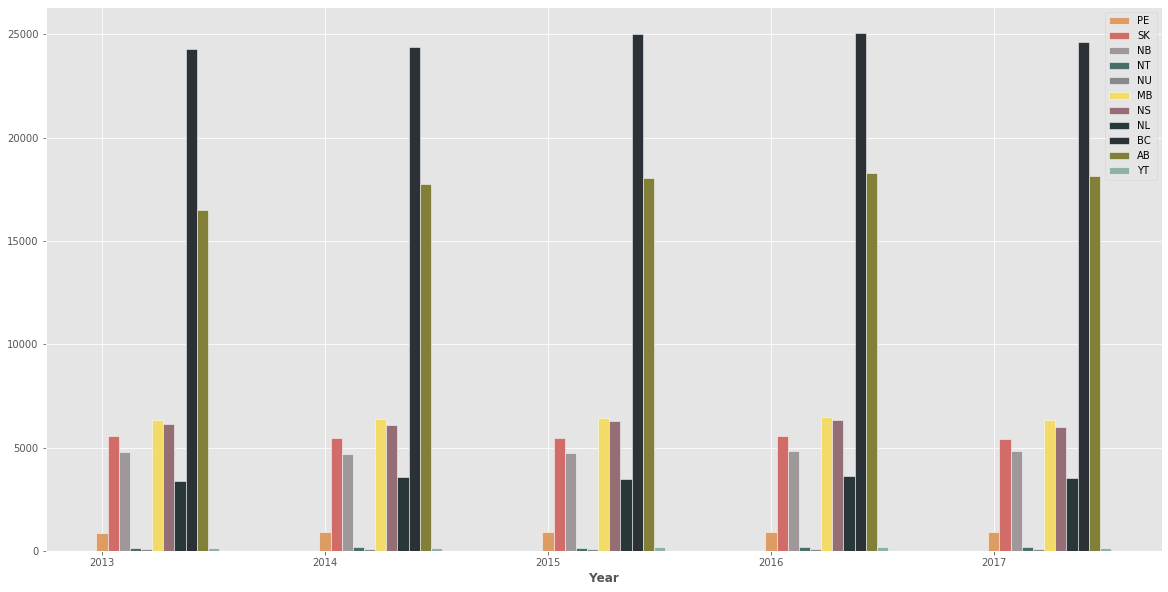

In [13]:
labels = ['2013', '2014', '2015', '2016', '2017']

plt.figure(figsize=(20,10))

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#set bar width
barWidth = .05

#set bar height
geo1 = cdn_cancer_2013_2017_df[geo_pe]['value']
geo2 = cdn_cancer_2013_2017_df[geo_sk]['value']
geo3 = cdn_cancer_2013_2017_df[geo_nb]['value']
geo4 = cdn_cancer_2013_2017_df[geo_nt]['value']
geo5 = cdn_cancer_2013_2017_df[geo_nu]['value']
geo6 = cdn_cancer_2013_2017_df[geo_mb]['value']
geo7 = cdn_cancer_2013_2017_df[geo_ns]['value']
geo8 = cdn_cancer_2013_2017_df[geo_nl]['value']
geo9 = cdn_cancer_2013_2017_df[geo_bc]['value']
geo10 = cdn_cancer_2013_2017_df[geo_ab]['value']
geo11 = cdn_cancer_2013_2017_df[geo_yt]['value']

#set positon of bar on X axis
x = np.arange(len(geo1))
x1 = [x + barWidth for x in x]
x2 = [x + barWidth for x in x1]
x3 = [x + barWidth for x in x2]
x4 = [x + barWidth for x in x3]
x5 = [x + barWidth for x in x4]
x6 = [x + barWidth for x in x5]
x7 = [x + barWidth for x in x6]
x8 = [x + barWidth for x in x7]
x9 = [x + barWidth for x in x8]
x10 = [x + barWidth for x in x9]
x11 = [x + barWidth for x in x10]

plt.bar(x1, geo1, width = barWidth, edgecolor = 'white', color = '#DC9C63', label = 'PE')
plt.bar(x2, geo2, width = barWidth, edgecolor = 'white', color = '#D16C68', label = 'SK')
plt.bar(x3, geo3, width = barWidth, edgecolor = 'white', color = '#9F989B', label = 'NB')
plt.bar(x4, geo4, width = barWidth, edgecolor = 'white', color = '#486E6A', label = 'NT')
plt.bar(x5, geo5, width = barWidth, edgecolor = 'white', color = '#838B8D', label = 'NU')
plt.bar(x6, geo6, width = barWidth, edgecolor = 'white', color = '#F3DB69', label = 'MB')
plt.bar(x7, geo7, width = barWidth, edgecolor = 'white', color = '#956D74', label = 'NS')
# plt.bar(r2, geo2, width = barWidth, edgecolor = 'white', color = '#d16c68', label = 'ON')
plt.bar(x8, geo8, width = barWidth, edgecolor = 'white', color = '#2A3738', label = 'NL')
plt.bar(x9, geo9, width = barWidth, edgecolor = 'white', color = '#2B3137', label = 'BC')
plt.bar(x10, geo10, width = barWidth, edgecolor = 'white', color = '#827F38', label = 'AB')
plt.bar(x11, geo11, width = barWidth, edgecolor = 'white', color = '#90B1A8', label = 'YT')

'''plt.plot(cdn_cancer_2013_2017_df[geo_yt]['year'], cdn_cancer_2013_2017_df[geo_yt]['value'])
plt.plot(cdn_cancer_2013_2017_df[geo_ab]['year'], cdn_cancer_2013_2017_df[geo_ab]['value'])
plt.plot(cdn_cancer_2013_2017_df[geo_bc]['year'], cdn_cancer_2013_2017_df[geo_bc]['value'])
plt.plot(cdn_cancer_2013_2017_df[geo_nl]['year'], cdn_cancer_2013_2017_df[geo_nl]['value'])
plt.plot(cdn_cancer_2013_2017_df[geo_ns]['year'], cdn_cancer_2013_2017_df[geo_ns]['value'])
plt.plot(cdn_cancer_2013_2017_df[geo_mb]['year'], cdn_cancer_2013_2017_df[geo_mb]['value'])
plt.plot(cdn_cancer_2013_2017_df[geo_nu]['year'], cdn_cancer_2013_2017_df[geo_nu]['value'])
plt.plot(cdn_cancer_2013_2017_df[geo_nt]['year'], cdn_cancer_2013_2017_df[geo_nt]['value'])
plt.plot(cdn_cancer_2013_2017_df[geo_nb]['year'], cdn_cancer_2013_2017_df[geo_nb]['value'])
plt.plot(cdn_cancer_2013_2017_df[geo_sk]['year'], cdn_cancer_2013_2017_df[geo_sk]['value'])
plt.plot(cdn_cancer_2013_2017_df[geo_pe]['year'], cdn_cancer_2013_2017_df[geo_pe]['value'])'''

plt.xlabel('Year', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(geo1))], cdn_cancer_2013_2017_df['year'])

#Create Legend
plt.legend()
plt.show()

In [14]:
cancer_numbers = (cdn_cancer_2013_2017_df['uom'] == 'Number')

cancer_pivot = cdn_cancer_2013_2017_df[cancer_numbers].pivot_table(index='geo',
                                    columns='year',
                                    values='value')

cancer_pivot

year,2013,2014,2015,2016,2017
geo,,,,,
Alberta,16520.0,17770.0,18040.0,18310.0,18150.0
British Columbia,24300.0,24380.0,24995.0,25060.0,24610.0
Canada (excluding Quebec),143115.0,145300.0,148125.0,151150.0,149435.0
Manitoba,6325.0,6400.0,6425.0,6455.0,6310.0
New Brunswick,4785.0,4680.0,4755.0,4835.0,4845.0
Newfoundland and Labrador,3400.0,3560.0,3490.0,3635.0,3540.0
Northwest Territories,130.0,160.0,140.0,170.0,170.0
Nova Scotia,6130.0,6095.0,6280.0,6325.0,6005.0
Nunavut,65.0,65.0,70.0,70.0,85.0


OSError: ignored

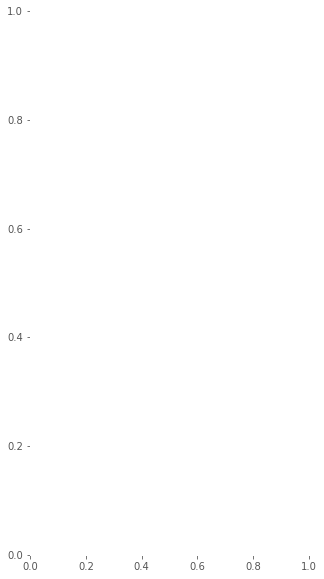

In [15]:
labels = ['2013', '2014', '2015', '2016', '2017']

fig2, ax2 = plt.subplots(figsize=(5, 10))

fig2.patch.set(facecolor='White') # Background (exterior)
ax2.set(facecolor='White') # Axes background (interior)

province_data = np.genfromtxt(fname, delimiter=',', names=True)

province = ['Alberta', 'British Columbia', 'Manitoba',
          'PsNew Brunswick', 'Newfoundland and Labrador', 'Northwest Territories',
          'Nova Scotia', 'Nunavut', 'Ontario',
          'Prince Edward Island', 'Saskatchewan', 'Yukon']

province_data = np.genfromtxt(fname, delimiter=',', names=True)

for column in province:
    # Plot each line separately with its own color.
    column_rec_name = column.replace('\n', '_').replace(' ', '_')

    line, = ax.plot('Year', column_rec_name, data=province_data,
                    lw=2.5)

    # Add a text label to the right end of every line. Most of the code below
    # is adding specific offsets y position because some labels overlapped.
    y_pos = province_data[column_rec_name][-1] - 0.5

    if column in y_offsets:
        y_pos += y_offsets[column]

    # Again, make sure that all labels are large enough to be easily read
    # by the viewer.
    ax.text(2011.5, y_pos, column, fontsize=14, color=line.get_color())

#plt.plot(cdn_cancer_2013_2017_df[geo_yt]['year'], cdn_cancer_2013_2017_df[geo_yt]['value'], lw=2.5)
#plt.plot(cdn_cancer_2013_2017_df[geo_ab]['year'], cdn_cancer_2013_2017_df[geo_ab]['value'], lw=2.5)
#plt.plot(cdn_cancer_2013_2017_df[geo_bc]['year'], cdn_cancer_2013_2017_df[geo_bc]['value'], lw=2.5)
#plt.plot(cdn_cancer_2013_2017_df[geo_nl]['year'], cdn_cancer_2013_2017_df[geo_nl]['value'], lw=2.5)
#plt.plot(cdn_cancer_2013_2017_df[geo_ns]['year'], cdn_cancer_2013_2017_df[geo_ns]['value'], lw=2.5)
#plt.plot(cdn_cancer_2013_2017_df[geo_mb]['year'], cdn_cancer_2013_2017_df[geo_mb]['value'], lw=2.5)
#plt.plot(cdn_cancer_2013_2017_df[geo_nu]['year'], cdn_cancer_2013_2017_df[geo_nu]['value'], lw=2.5)
#plt.plot(cdn_cancer_2013_2017_df[geo_nt]['year'], cdn_cancer_2013_2017_df[geo_nt]['value'], lw=2.5)
#plt.plot(cdn_cancer_2013_2017_df[geo_nb]['year'], cdn_cancer_2013_2017_df[geo_nb]['value'], lw=2.5)
#plt.plot(cdn_cancer_2013_2017_df[geo_sk]['year'], cdn_cancer_2013_2017_df[geo_sk]['value'], lw=2.5)
#plt.plot(cdn_cancer_2013_2017_df[geo_pe]['year'], cdn_cancer_2013_2017_df[geo_pe]['value'], lw=2.5)

ax2.get_xaxis().tick_bottom()
ax2.get_yaxis().tick_left()

ax2.set_xticks(range(2013, 2018, 1))
ax2.set_yticks(range(0, 30000, 5000))
ax2.xaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))
ax2.yaxis.set_major_formatter(plt.FuncFormatter('{:.0f}'.format))

ax2.tick_params(axis='both', which='both', labelsize=14,
               bottom=False, top=False, labelbottom=True,
               left=False, right=False, labelleft=True)

ax2.grid(True, 'major', 'y', ls='--', lw=1, c='k', alpha=.3)

ax2.spines['left'].set_visible(True)
ax2.spines['right'].set_visible(True)
ax2.spines['top'].set_visible(True)
ax2.spines['bottom'].set_visible(True)

fig2.suptitle('Cancer incidence by porovince (2013-2017)\n', fontsize=15, ha='center')

#Create Legend
fig2.legend()
fig2.show()

#CDN aggricultural land percentage dataframe

In [19]:
cdn_agri_pct_df = pd.read_csv('https://github.com/Vanagand/DS-Unit-1-Build/raw/master/cdn_agri_land.csv')

cdn_agri_pct_df.head()

,year,value
0,1961,7.67855
1,1962,7.69263
2,1963,7.70671
3,1964,7.72067
4,1965,7.73486


#CDN farm amount dataframe

In [20]:
cdn_farm_df = pd.read_csv('https://github.com/Vanagand/DS-Unit-1-Build/raw/master/cdn_total_farm.csv')

cdn_farm_df.head()

,date,geo,farm_class,uom,value
0,2011,Canada,Total number of farms,number,205730
1,2016,Canada,Total number of farms,number,193492
2,2011,Canada,Farms under 10 acres,number,12991
3,2016,Canada,Farms under 10 acres,number,13193
4,2011,Canada,Farms 10 to 69 acres,number,32705
